# Problem: Bike rental forecast
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

In [44]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV




%matplotlib inline

In [2]:
bike = pd.read_csv('/Users/sabrinafruhauf/Desktop/05_SpicedCourse/Week_03_regression/bike-sharing-demand/train.csv', parse_dates=True)
bike.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike.shape

(10886, 12)

In [4]:
bike.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
bike["date"] = bike.datetime.apply(lambda x : x.split()[0])
bike["year_num"] = bike.date.apply(lambda x : x.split('-')[0]).astype('int')
bike["month_num"] = bike.date.apply(lambda x : x.split('-')[1]).astype('int')
bike["day_num"] = bike.date.apply(lambda x : x.split('-')[2]).astype('int')
bike["month"] = bike.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
bike["weekday"] = bike.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
bike["hour"] = bike.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype('int')


In [6]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year_num,month_num,day_num,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,1,January,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1,1,January,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,1,1,January,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,1,1,January,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,1,1,January,Saturday,4


In [7]:
bike.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
date           object
year_num        int64
month_num       int64
day_num         int64
month          object
weekday        object
hour            int64
dtype: object

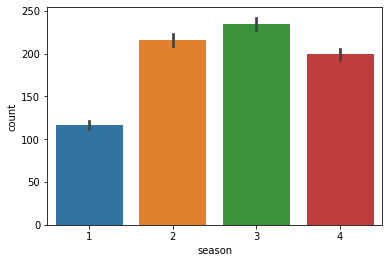

In [8]:
sns.barplot(x='season', y='count', data=bike);

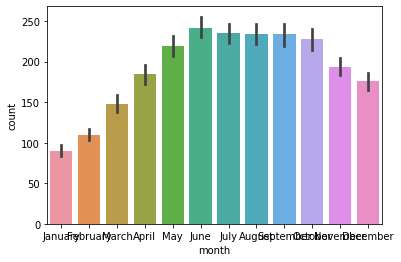

In [9]:
sns.barplot(x='month', y='count', data=bike);

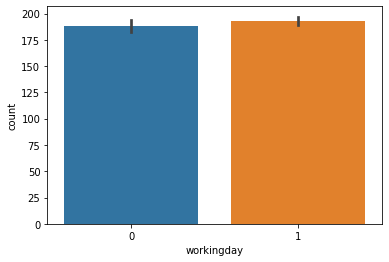

In [10]:
sns.barplot(x='workingday', y='count', data=bike);

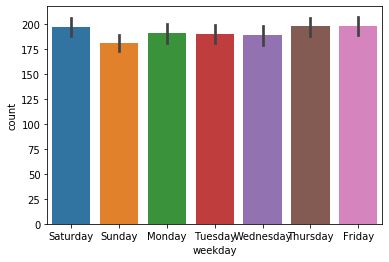

In [11]:
sns.barplot(x='weekday', y='count', data=bike);

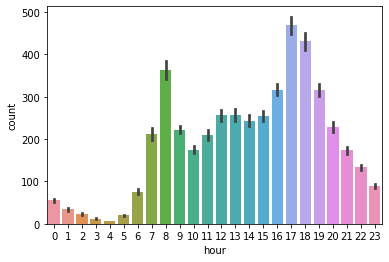

In [12]:
sns.barplot(x='hour', y='count', data=bike);

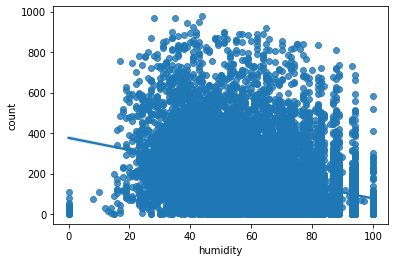

In [13]:
sns.regplot(x="humidity", y="count", data=bike)

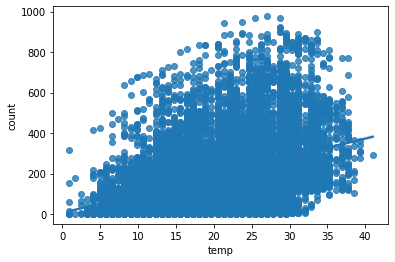

In [14]:
sns.regplot(x="temp", y="count", data=bike)

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

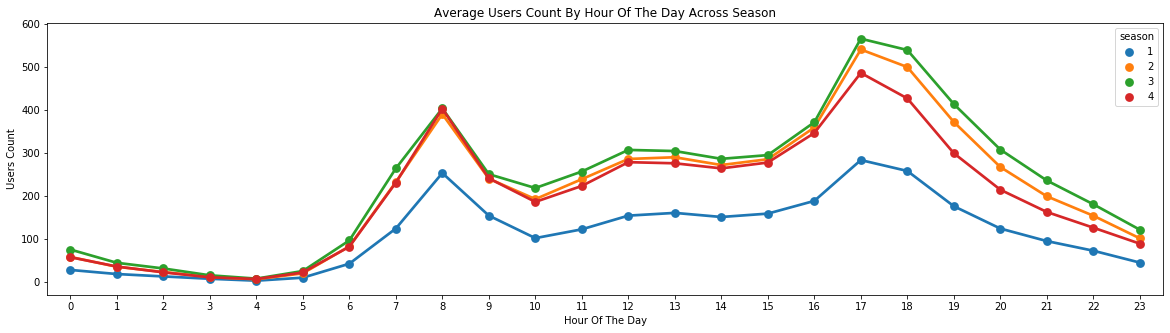

In [15]:
hourAggregated = pd.DataFrame(bike.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
plt.figure(figsize=(20,5))
sns.pointplot(x=hourAggregated["hour"], 
              y=hourAggregated["count"],
              hue=hourAggregated["season"], 
              data=hourAggregated, join=True).set(xlabel='Hour Of The Day', 
                                                  ylabel='Users Count',
                                                  title="Average Users Count By Hour Of The Day Across Season",
                                                  label='big')

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average users count by hour of the day across weekdays'),
 None]

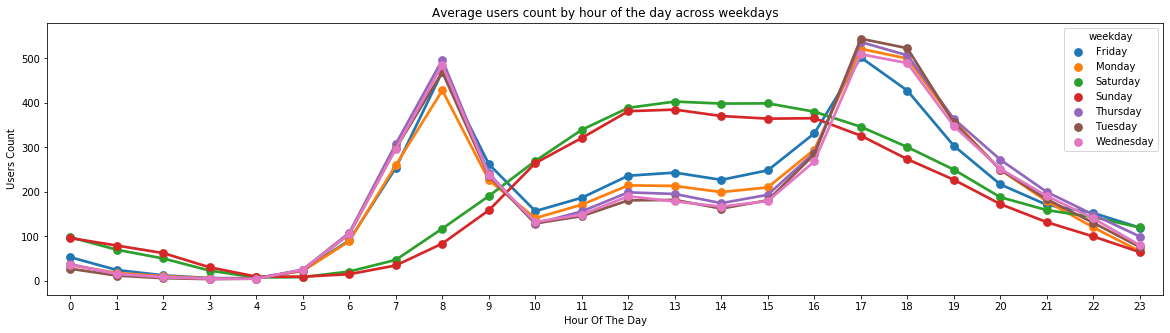

In [16]:
hourAggregated = pd.DataFrame(bike.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
plt.figure(figsize=(20,5))
sns.pointplot(x=hourAggregated["hour"], 
              y=hourAggregated["count"],
              hue=hourAggregated["weekday"], 
              data=hourAggregated, 
              join=True,
              ).set(xlabel='Hour Of The Day', 
                    ylabel='Users Count',
                    title="Average users count by hour of the day across weekdays", 
                    label='big')

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Average users count by temp across months'),
 None]

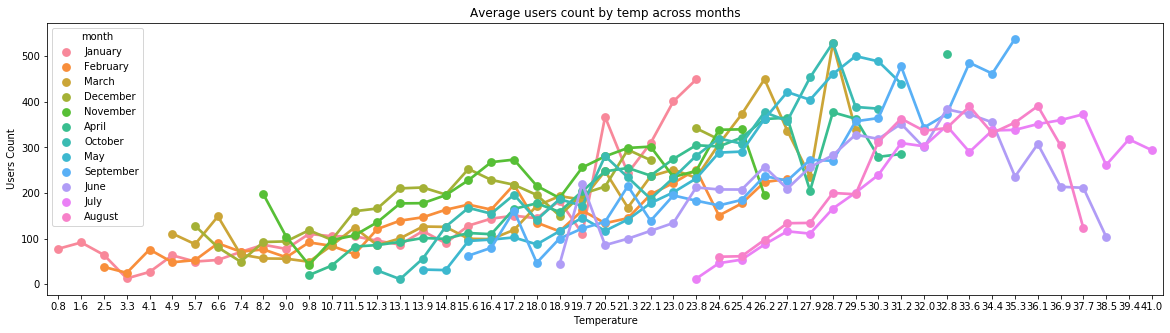

In [18]:
tempAggregated = pd.DataFrame(bike.groupby(["temp","month"],sort=True)["count"].mean()).reset_index()
plt.figure(figsize=(20,5))
sns.pointplot(x=tempAggregated["temp"].round(1), 
              y=tempAggregated["count"],
              hue=tempAggregated["month"], 
              data=tempAggregated, join=True).set(xlabel='Temperature', 
                                                  ylabel='Users Count',
                                                  title="Average users count by temp across months",
                                                  label='big')

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Days of the month'),
 Text(0.5, 1.0, 'Average users count by days across months'),
 None]

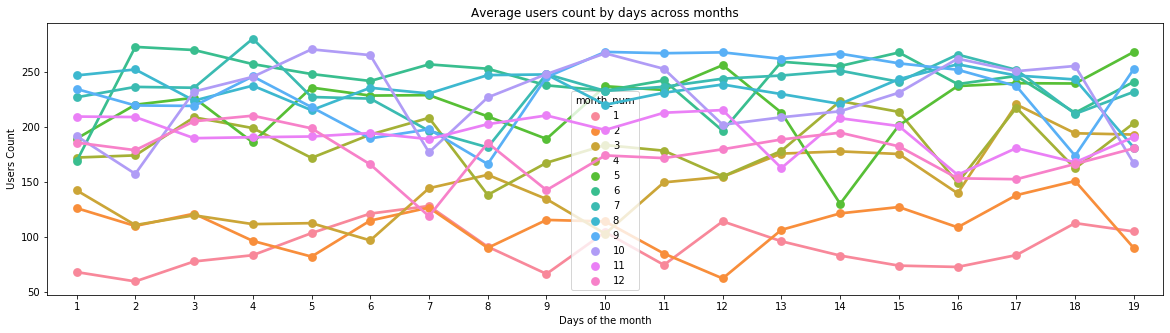

In [21]:
dayAggregated = pd.DataFrame(bike.groupby(["day_num","month_num"],sort=True)["count"].mean()).reset_index()
plt.figure(figsize=(20,5))
sns.pointplot(x=dayAggregated["day_num"].round(1), 
              y=dayAggregated["count"],
              hue=dayAggregated["month_num"], 
              data=dayAggregated, join=True).set(xlabel='Days of the month', 
                                                  ylabel='Users Count',
                                                  title="Average users count by days across months",
                                                  label='big')

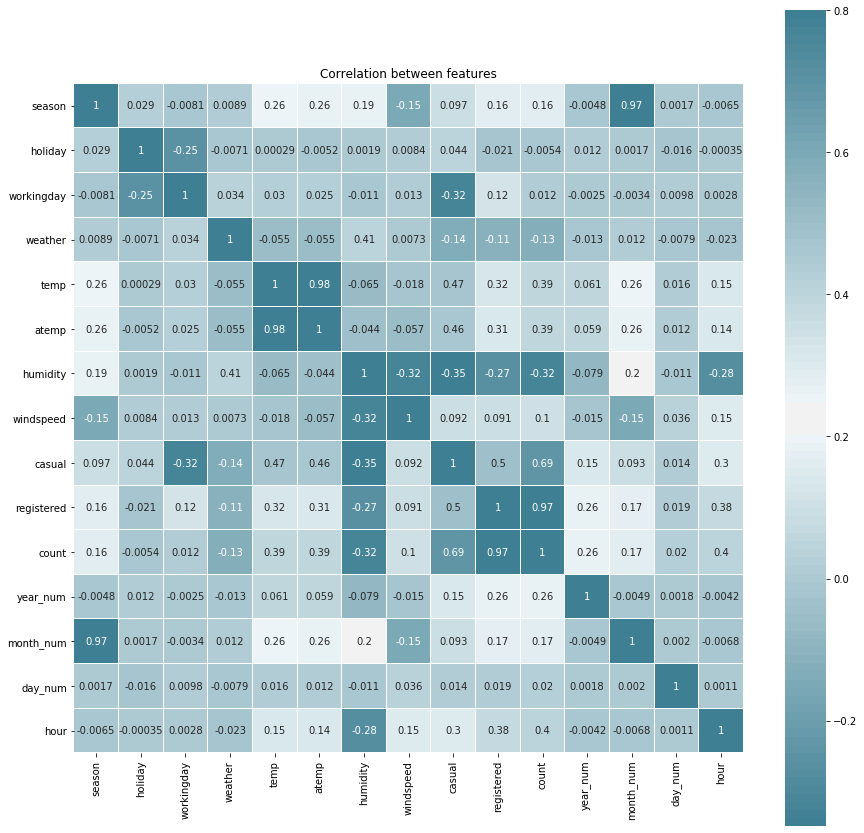

In [22]:
corr=bike.corr() #["count"]
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap=sns.diverging_palette(220, 220, n=100),linecolor='white')
plt.title('Correlation between features');

In [23]:
bike.corr()["count"].abs().sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
humidity      0.317371
year_num      0.260403
month_num     0.166862
season        0.163439
weather       0.128655
windspeed     0.101369
day_num       0.019826
workingday    0.011594
holiday       0.005393
Name: count, dtype: float64

In [25]:
bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'year_num', 'month_num', 'day_num', 'month', 'weekday', 'hour'],
      dtype='object')

In [26]:
bike.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
date           object
year_num        int64
month_num       int64
day_num         int64
month          object
weekday        object
hour            int64
dtype: object

In [27]:
# define x and y
x = bike[['season', 'holiday', 'workingday', 'weather', 'temp',
          'atemp', 'humidity', 'windspeed', 'casual', 'registered', 
          'count', 'year_num', 'month_num', 'day_num', 'hour']]
y = bike['count']

In [40]:
# train test split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((8708, 15), (2178, 15), (8708,), (2178,))

In [34]:
# Fit a Linear regression model to the data
m = LinearRegression()
m.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
m.coef_, m.intercept_

(array([ 4.70262121e-14,  4.28603512e-13, -4.33897293e-14,  3.37033661e-14,
         4.49726102e-15,  6.23169310e-15, -3.65267549e-15, -1.70933868e-17,
         3.33333333e-01,  3.33333333e-01,  6.66666667e-01, -2.41072293e-15,
        -4.20417824e-15, -7.38617889e-16, -6.42798541e-17]),
 4.348521542851813e-12)

In [38]:
ypred = m.predict(xtrain)

In [39]:
m.score(xtrain,ytrain)

1.0

In [47]:
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error( ytrain, ypred ))
print ("RMSLE Value For Linear Regression: ",rmsle)

RMSLE Value For Linear Regression:  4.0697701376825756e-14
